# Songs Dataset Feature Extraction


In [208]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
# reading the dataset
df=pd.read_csv('song_data.csv')

In [210]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Unnamed: 15
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,NaN
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,NaN
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,NaN
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,NaN
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,NaN


In [211]:
df=df.drop(['Unnamed: 15', 'song_name'], axis=1)

In [212]:
df.shape

(18835, 14)

In [213]:
# correlation
corr=df.corr()

In [214]:
corr

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


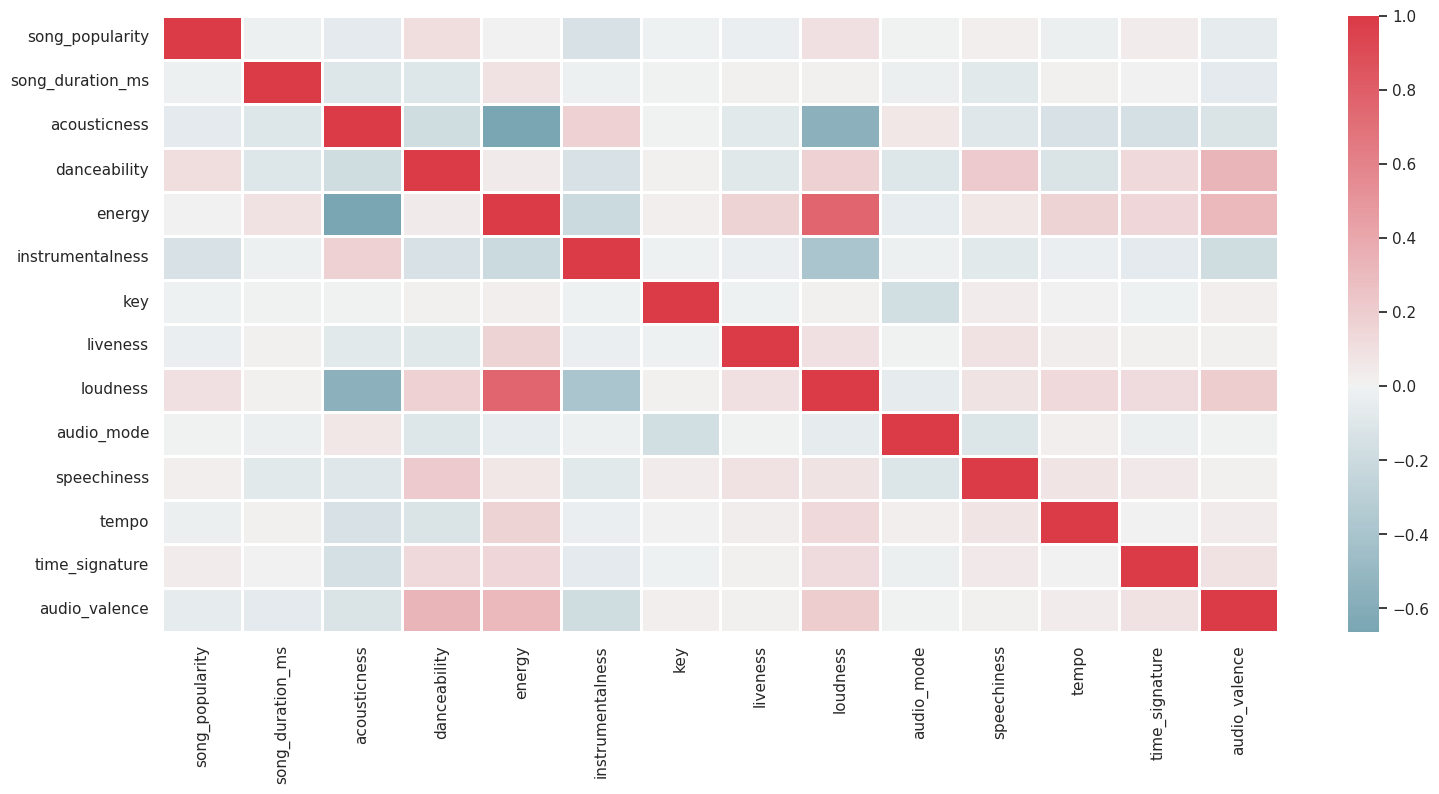

In [215]:
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap=sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [216]:
df.shape

(18835, 14)

In [217]:
#feature_1
df['tempo_time_sig.'] = np.log(df['tempo']) * df['time_signature']

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [218]:
#feature_2
df['mean_dan_energy_val']=(df['danceability'] + df['energy'] + df['audio_valence'])/3

In [219]:
# feature_3
df['key_live'] = df['key'] * df['liveness']

In [220]:
# feature_4
df['beats_per_sec'] = df['tempo']/(df['song_duration_ms']/1000)

In [221]:
# feature_5
df['Boringness'] = df['loudness'] + df['tempo'] + df['energy']*100 + df['danceability']*100

In [222]:
# feature_6
df['mean_instrument_acousticnes'] = (df['acousticness'] + df['instrumentalness'])/2

In [223]:
df.shape

(18835, 20)

In [224]:
corr=df.corr()

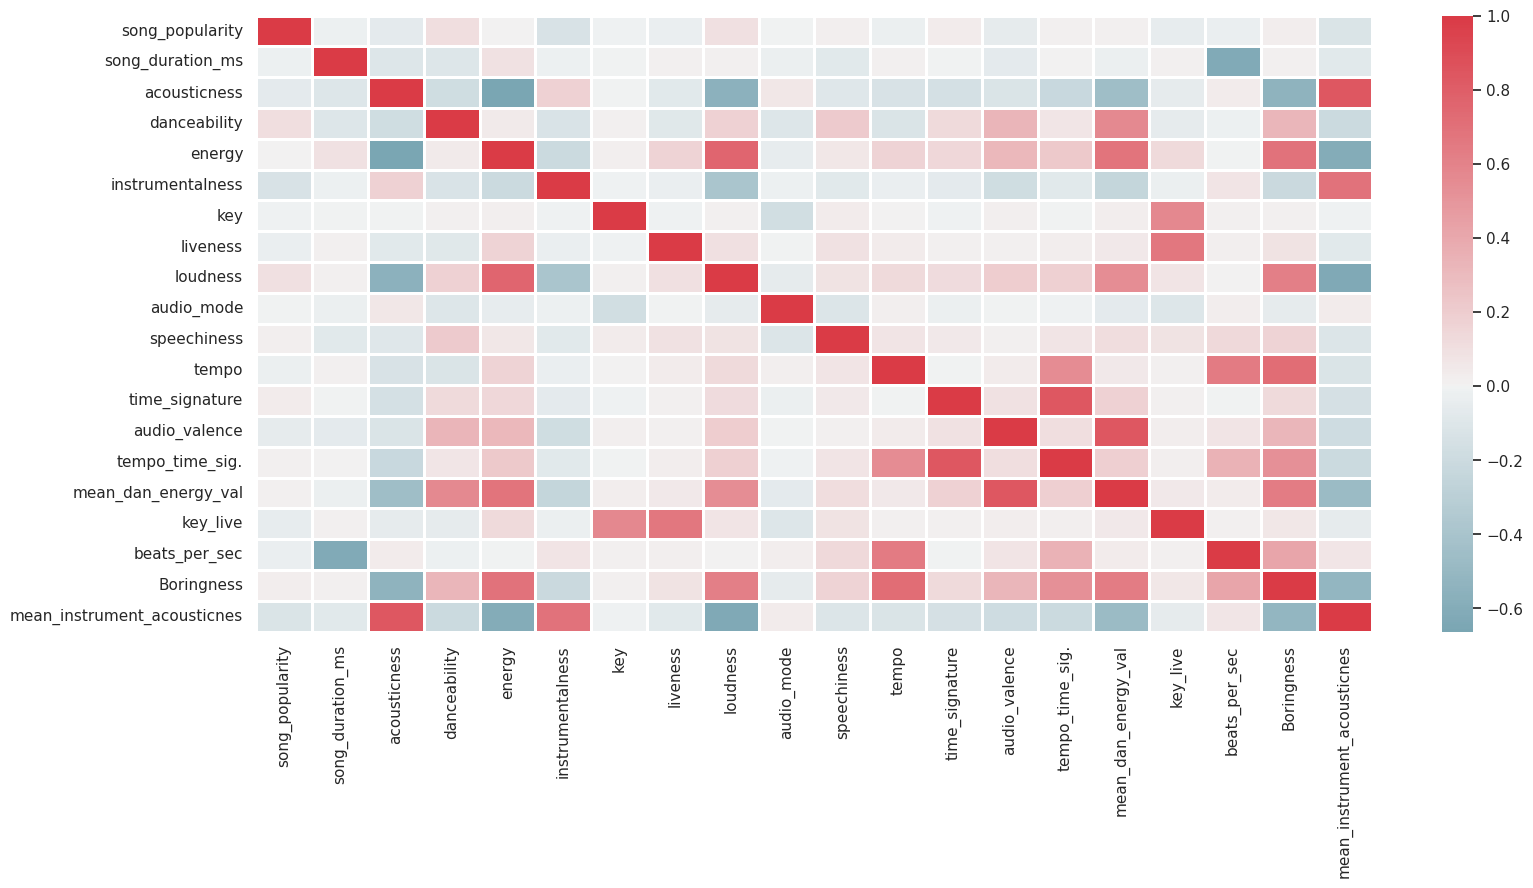

In [247]:
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap=sns.heatmap(corr,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

In [226]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,tempo_time_sig.,mean_dan_energy_val,key_live,beats_per_sec,Boringness,mean_instrument_acousticnes
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,20.473412,0.550667,0.4712,0.636824,280.765,0.002775
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,18.625582,0.588333,0.3240,0.485200,238.349,0.005150
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,19.277286,0.508000,0.0000,0.534585,236.053,0.227585
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,19.230615,0.539667,0.0000,0.564432,259.606,0.014975
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,20.590234,0.595667,1.1300,0.768503,288.246,0.000477


In [227]:
# Missing values
df.isnull().sum()

song_popularity                0
song_duration_ms               0
acousticness                   0
danceability                   0
energy                         0
instrumentalness               0
key                            0
liveness                       0
loudness                       0
audio_mode                     0
speechiness                    0
tempo                          0
time_signature                 0
audio_valence                  0
tempo_time_sig.                2
mean_dan_energy_val            0
key_live                       0
beats_per_sec                  0
Boringness                     0
mean_instrument_acousticnes    0
dtype: int64

In [228]:
df.dropna(inplace=True)

In [229]:
df.isnull().sum()

song_popularity                0
song_duration_ms               0
acousticness                   0
danceability                   0
energy                         0
instrumentalness               0
key                            0
liveness                       0
loudness                       0
audio_mode                     0
speechiness                    0
tempo                          0
time_signature                 0
audio_valence                  0
tempo_time_sig.                0
mean_dan_energy_val            0
key_live                       0
beats_per_sec                  0
Boringness                     0
mean_instrument_acousticnes    0
dtype: int64

In [230]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [231]:
# feature scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [232]:
# Independent and dependent  variable
x  = df.drop('song_popularity', axis=1)
y = df[['song_popularity']]

In [233]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=49)

In [234]:
# feature scaling
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [235]:
# fitting the data to algorith
regr = DecisionTreeRegressor(random_state=0, max_depth=7)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [236]:
# r2_score
score = r2_score(y_test, predictions)
print(score)

0.09616449205696154


#Data Analysis (Additional)

In [237]:
df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,tempo_time_sig.,mean_dan_energy_val,key_live,beats_per_sec,Boringness,mean_instrument_acousticnes
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,20.473412,0.550667,0.4712,0.636824,280.765,0.002775
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,18.625582,0.588333,0.3240,0.485200,238.349,0.005150
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,19.277286,0.508000,0.0000,0.534585,236.053,0.227585
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,19.230615,0.539667,0.0000,0.564432,259.606,0.014975
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,20.590234,0.595667,1.1300,0.768503,288.246,0.000477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,18.943706,0.317000,1.2210,0.713890,162.962,0.446533
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,18.185331,0.307000,1.1550,0.458442,145.808,0.382501
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,19.486535,0.443333,0.0000,0.716389,222.712,0.423500
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,18.656133,0.379000,0.3570,0.301076,175.443,0.480350


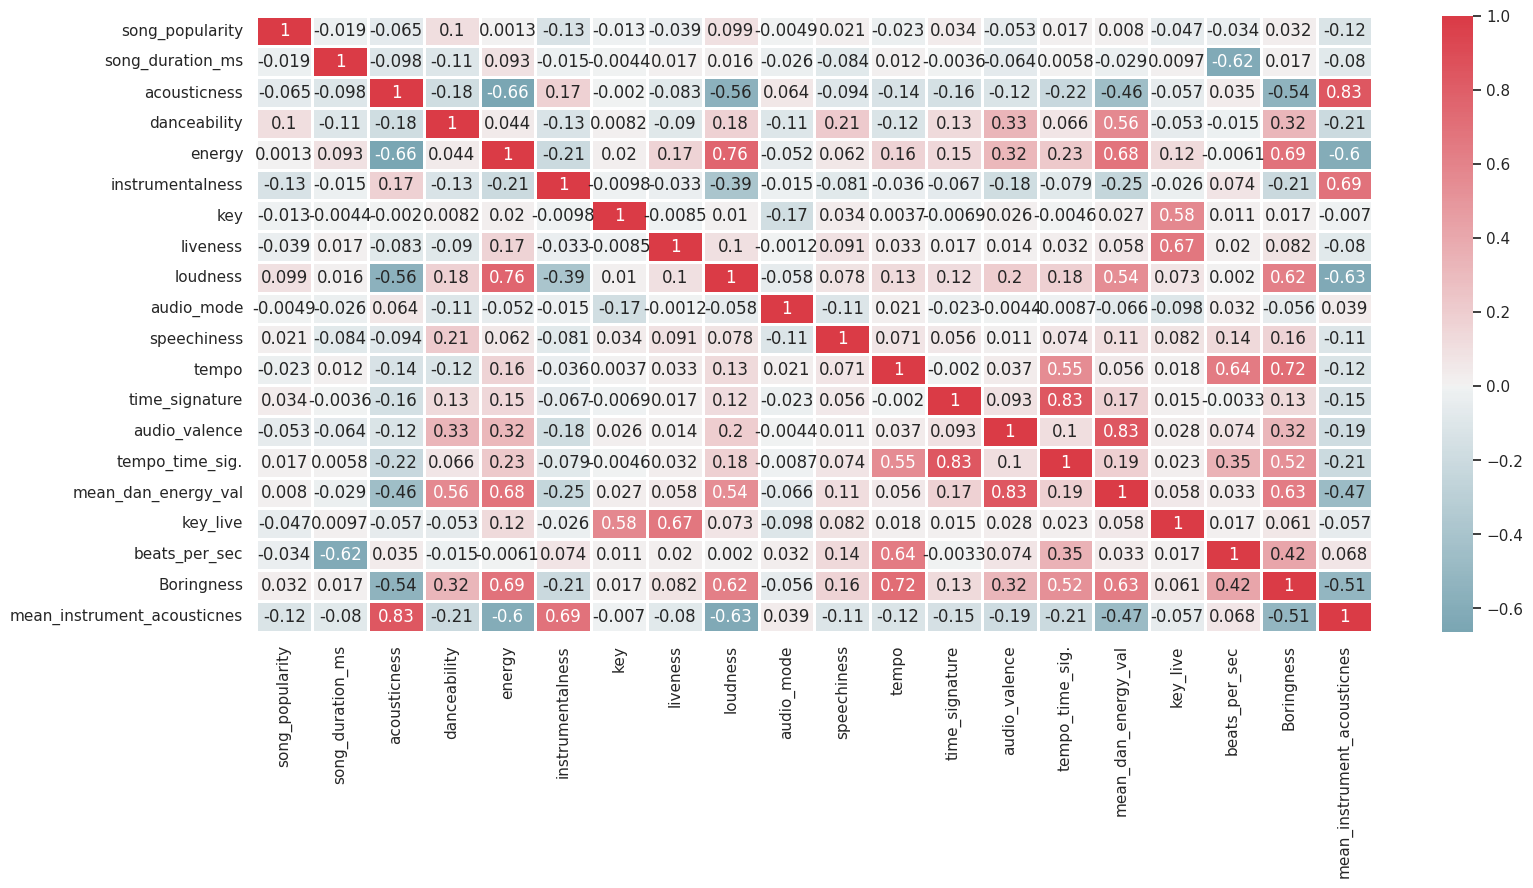

In [238]:
corr=df.corr()
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap=sns.heatmap(corr,annot=True,cmap=cmap, center=0.0,vmax = 1, linewidths=1, ax=ax)
plt.show()

- Relation between energy and song_popularity

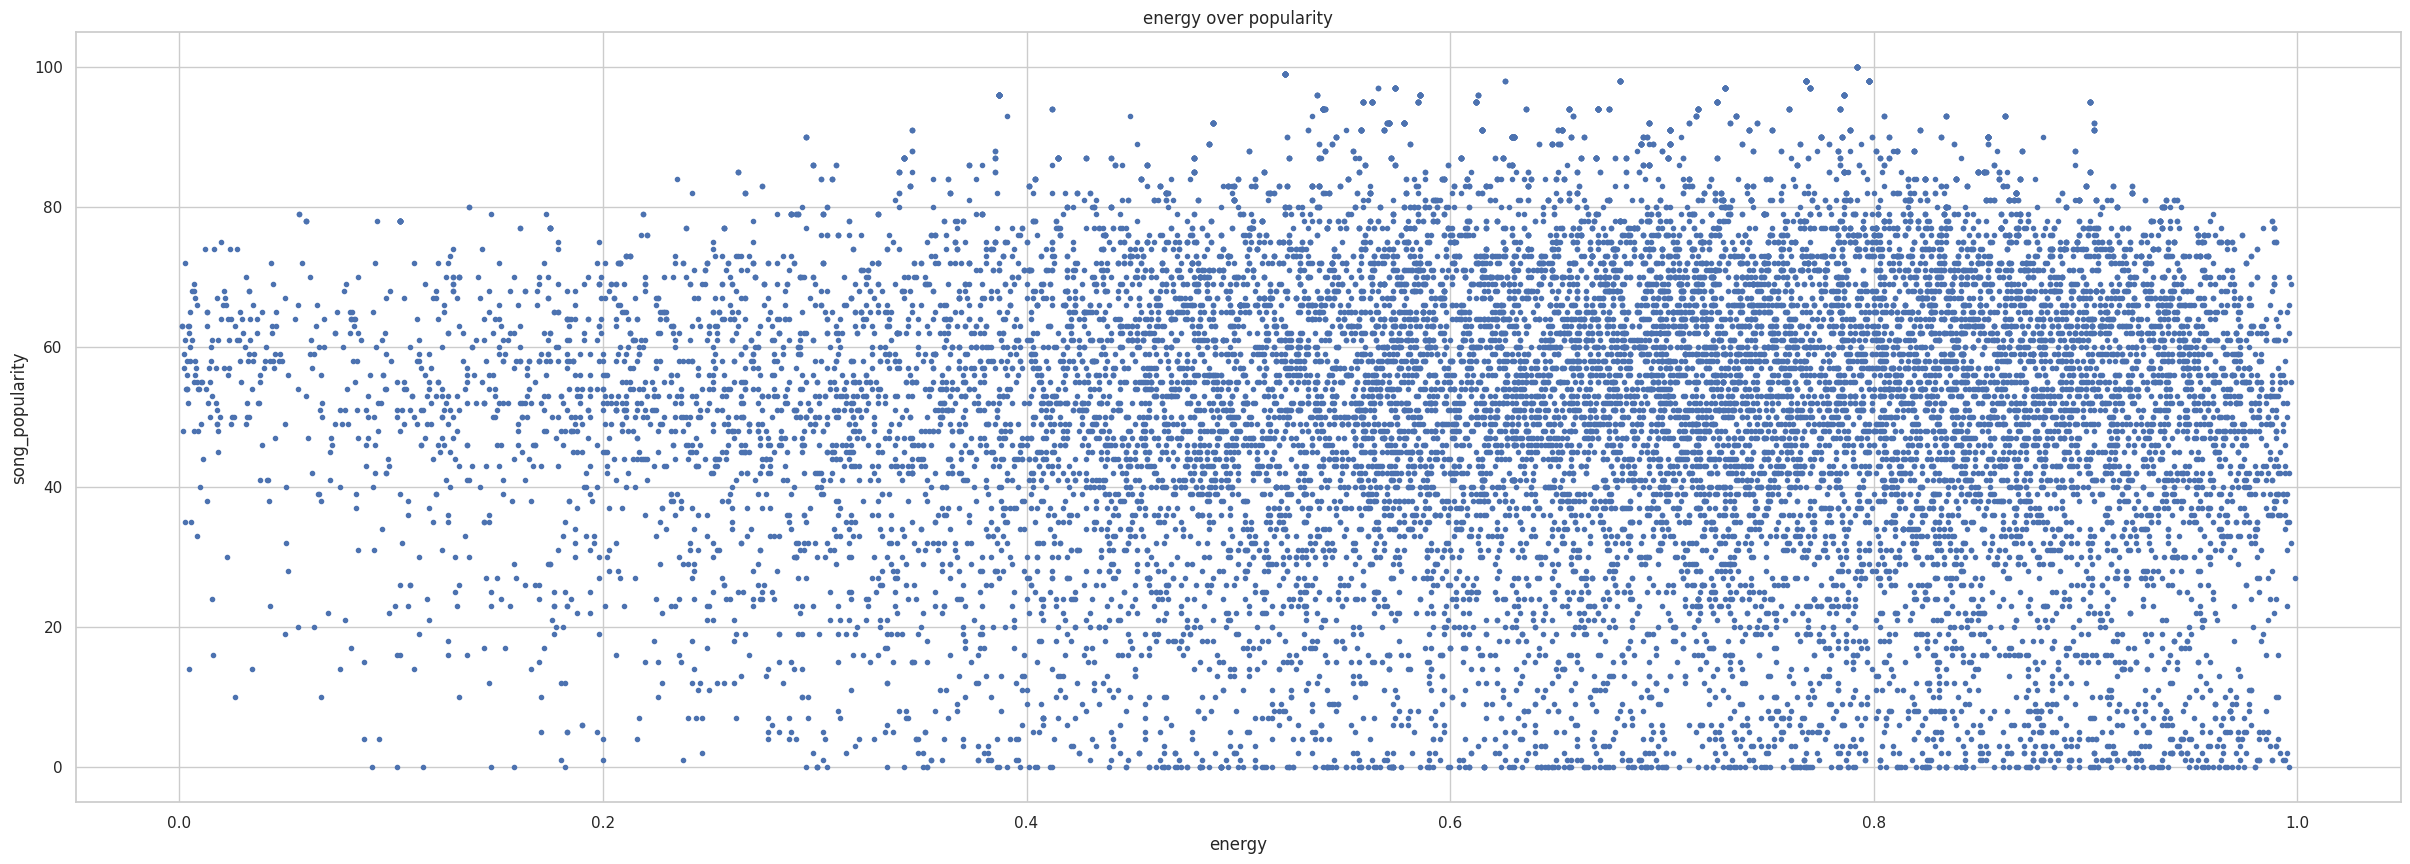

In [239]:
plt.figure(figsize=(30, 10))

xs = df['energy'].to_numpy()
ys = df['song_popularity'].to_numpy()
plt.ylabel('song_popularity')
plt.xlabel('energy')
plt.title('energy over popularity')
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean energy for song popularity')

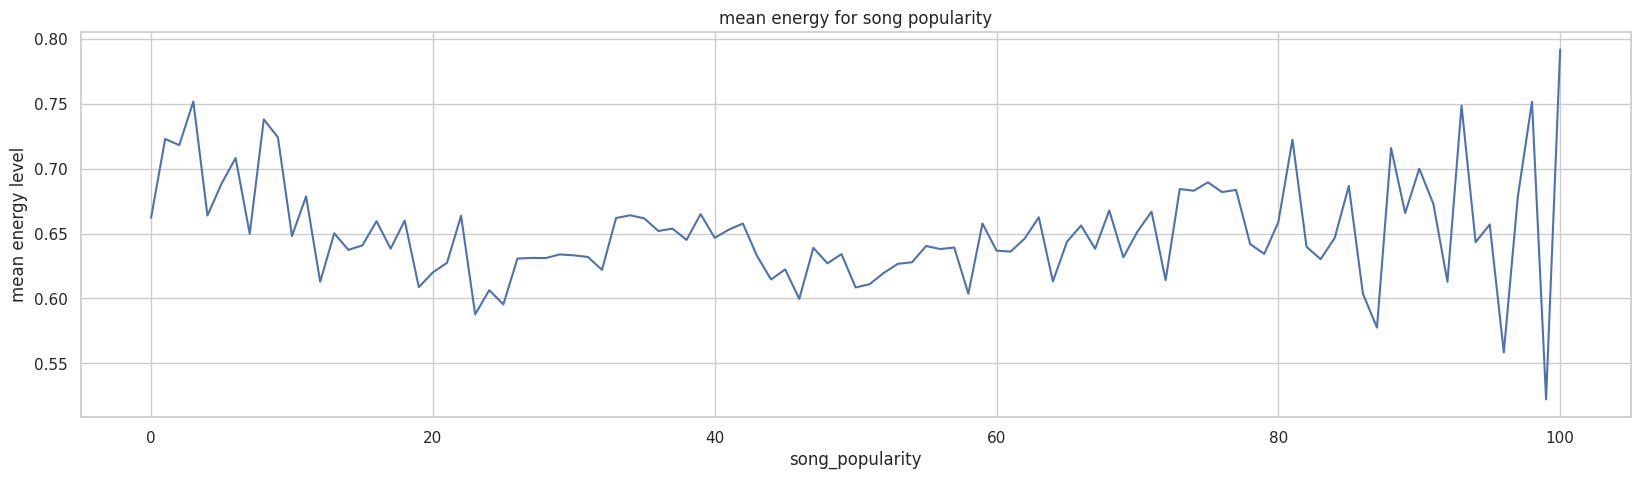

In [240]:
plt.figure(figsize=(20, 5))
sns.set(style='whitegrid')

# group by the song's popularity and then get the mean energy
x = df.groupby('song_popularity')['energy'].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean energy level')
axis.set_xlabel('song_popularity')
axis.set_title('mean energy for song popularity')

- Relationship between liveness and song_popularity

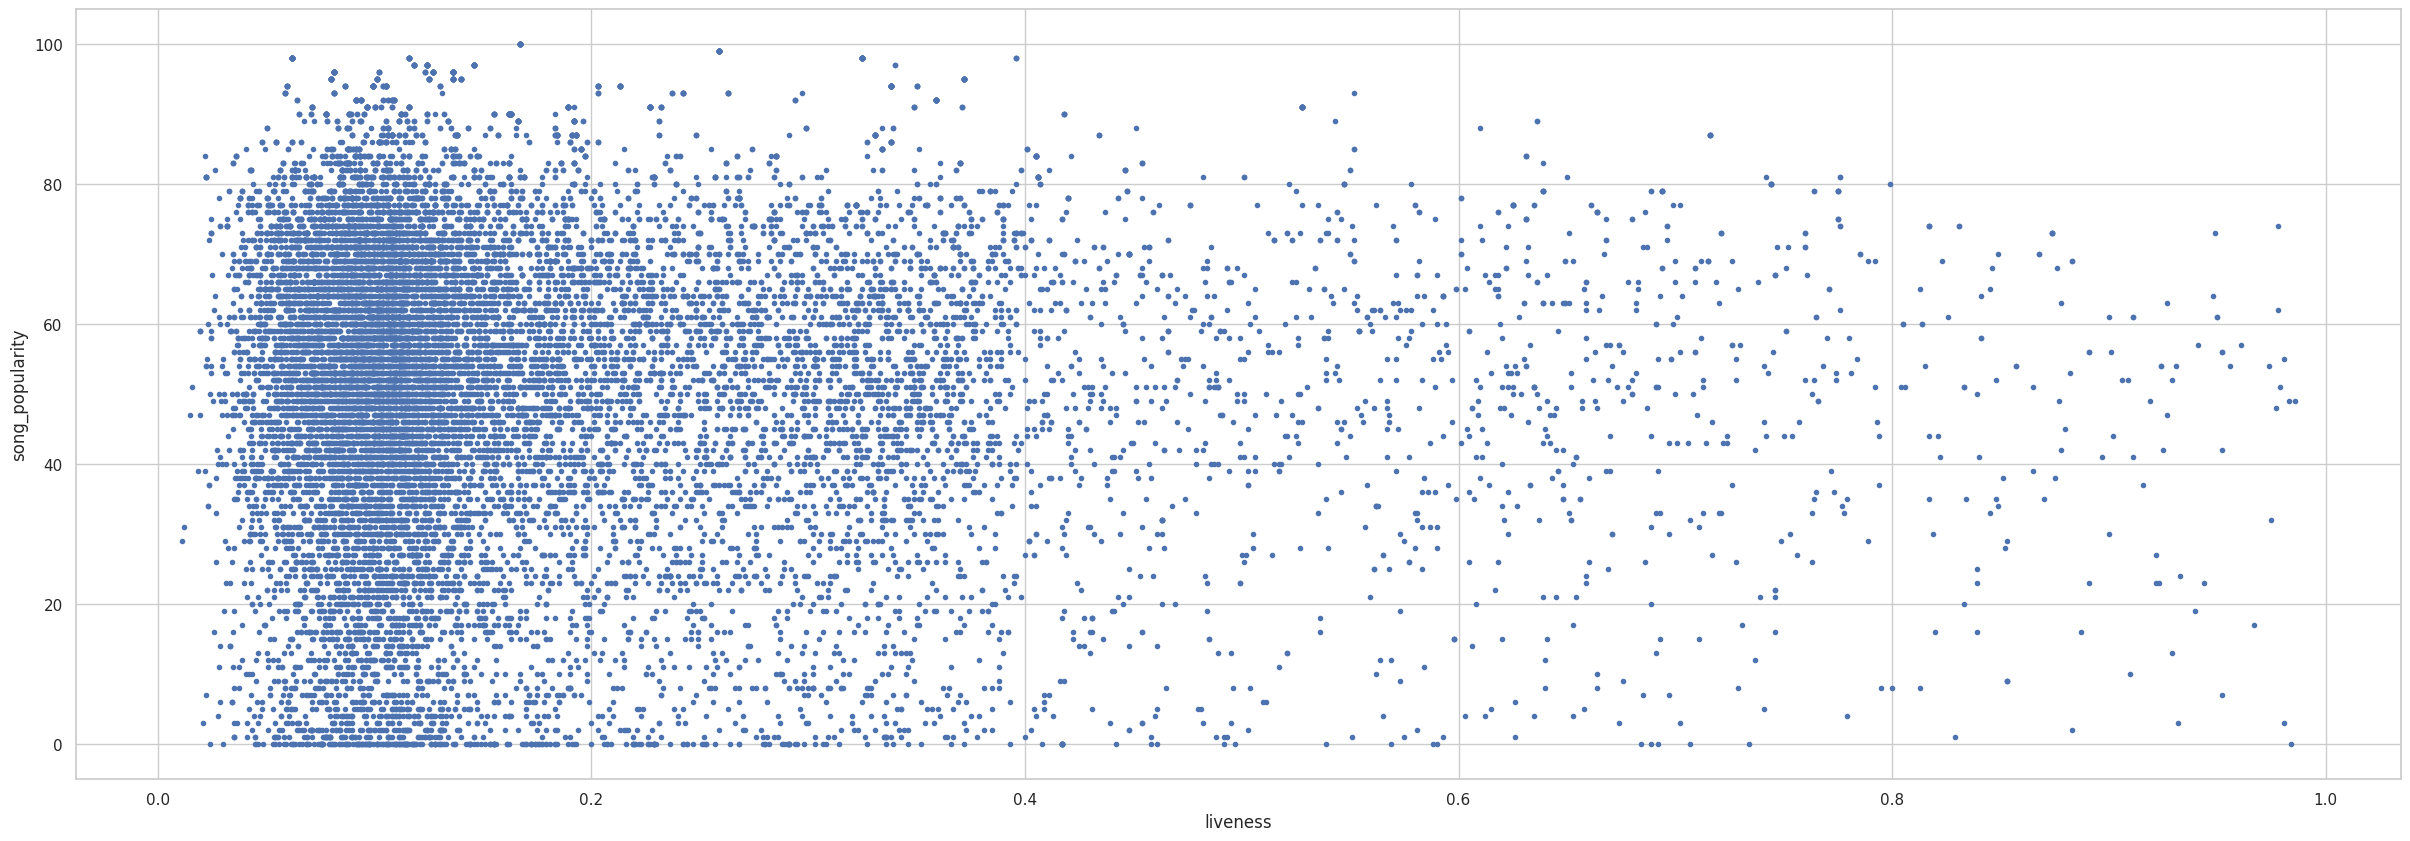

In [241]:
plt.figure(figsize=(30, 10))

xs = df['liveness'].to_numpy()
ys = df['song_popularity'].to_numpy()
plt.ylabel('song_popularity')
plt.xlabel('liveness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean livness for song popularity')

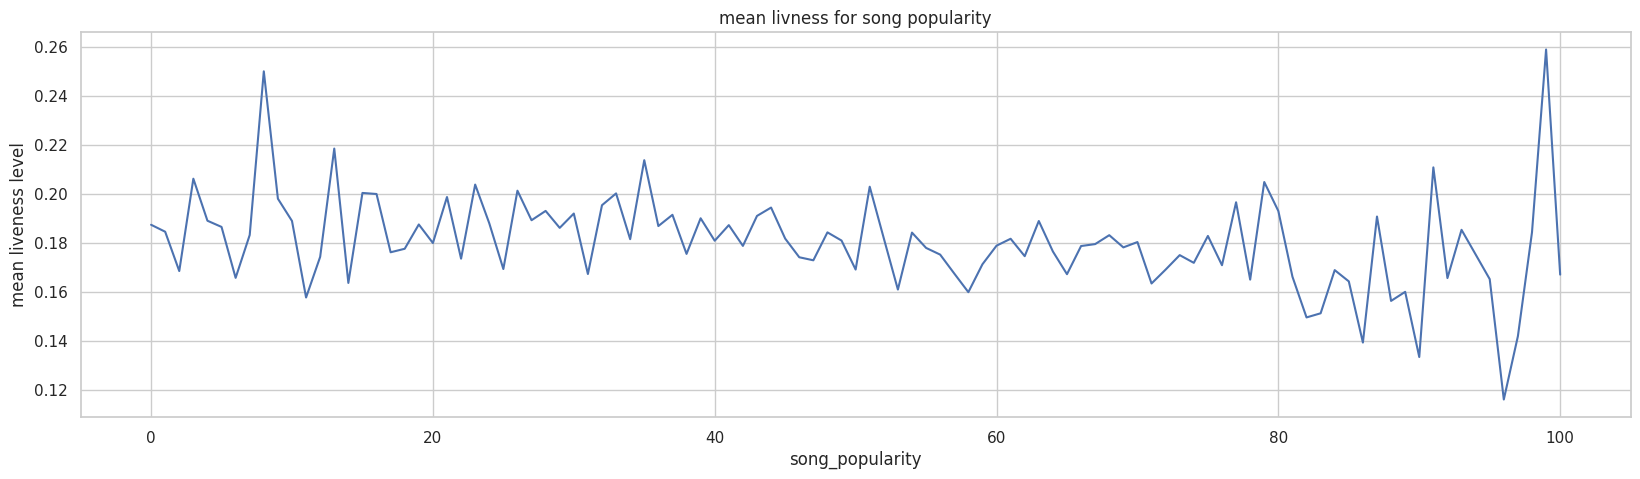

In [242]:
plt.figure(figsize=(20, 5))
sns.set(style='whitegrid')

# group by the song's popularity and then get the mean energy
x = df.groupby('song_popularity')['liveness'].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('song_popularity')
axis.set_title("mean livness for song popularity")

- Relation between Danceability and song_popularity

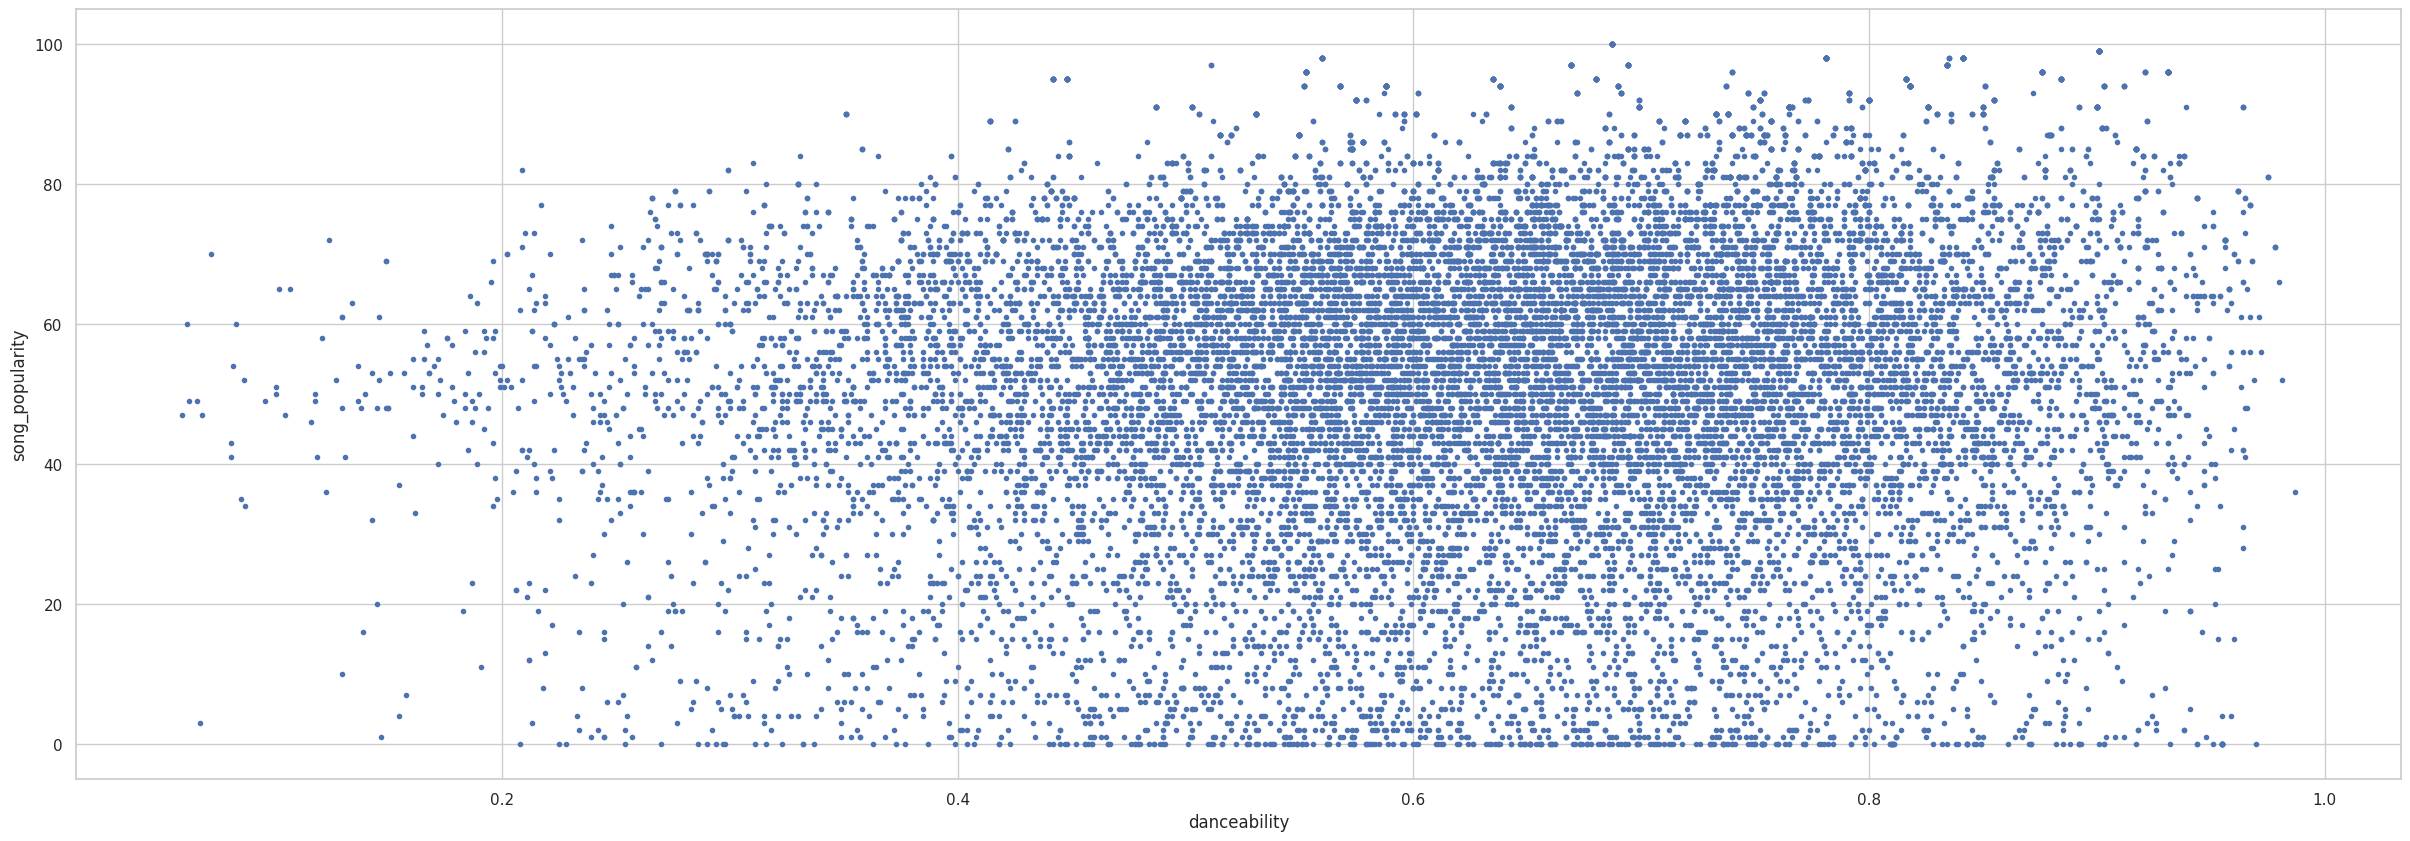

In [243]:
plt.figure(figsize=(30, 10))

xs = df['danceability'].to_numpy()
ys = df['song_popularity'].to_numpy()
plt.ylabel('song_popularity')
plt.xlabel('danceability')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean danceability for song popularity')

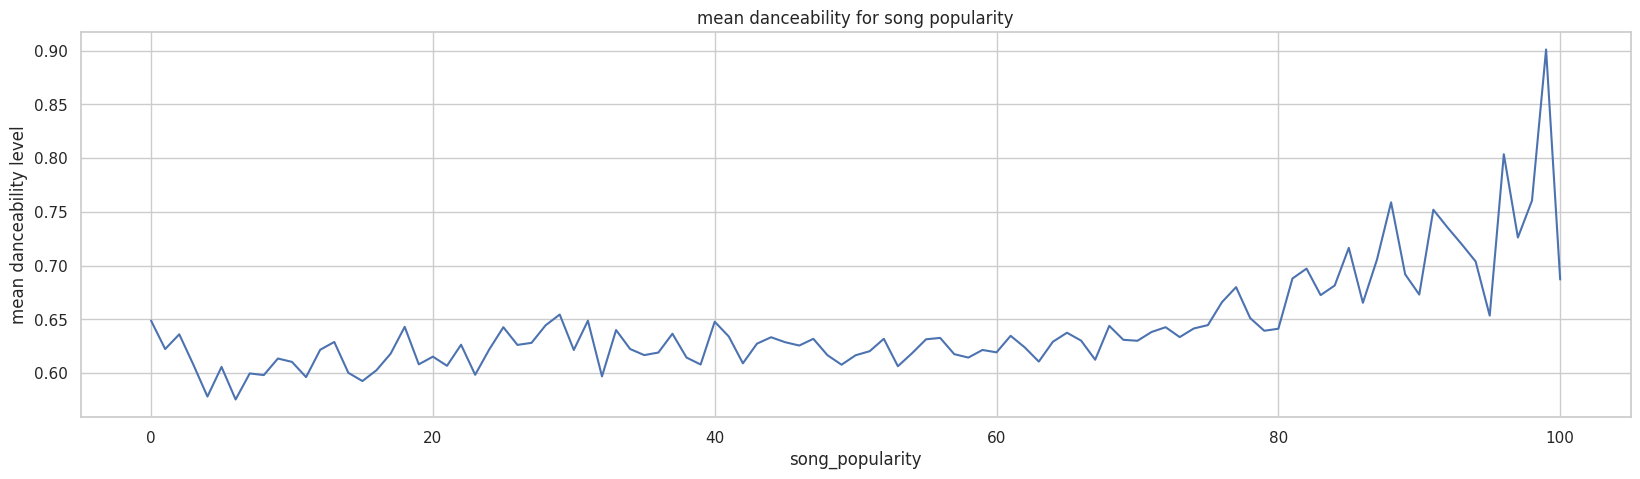

In [244]:
plt.figure(figsize=(20, 5))
sns.set(style='whitegrid')

# group by the song's popularity and then get the mean energy
x = df.groupby('song_popularity')['danceability'].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean danceability level')
axis.set_xlabel('song_popularity')
axis.set_title('mean danceability for song popularity')

- Relationship between acousticness and song_popularity

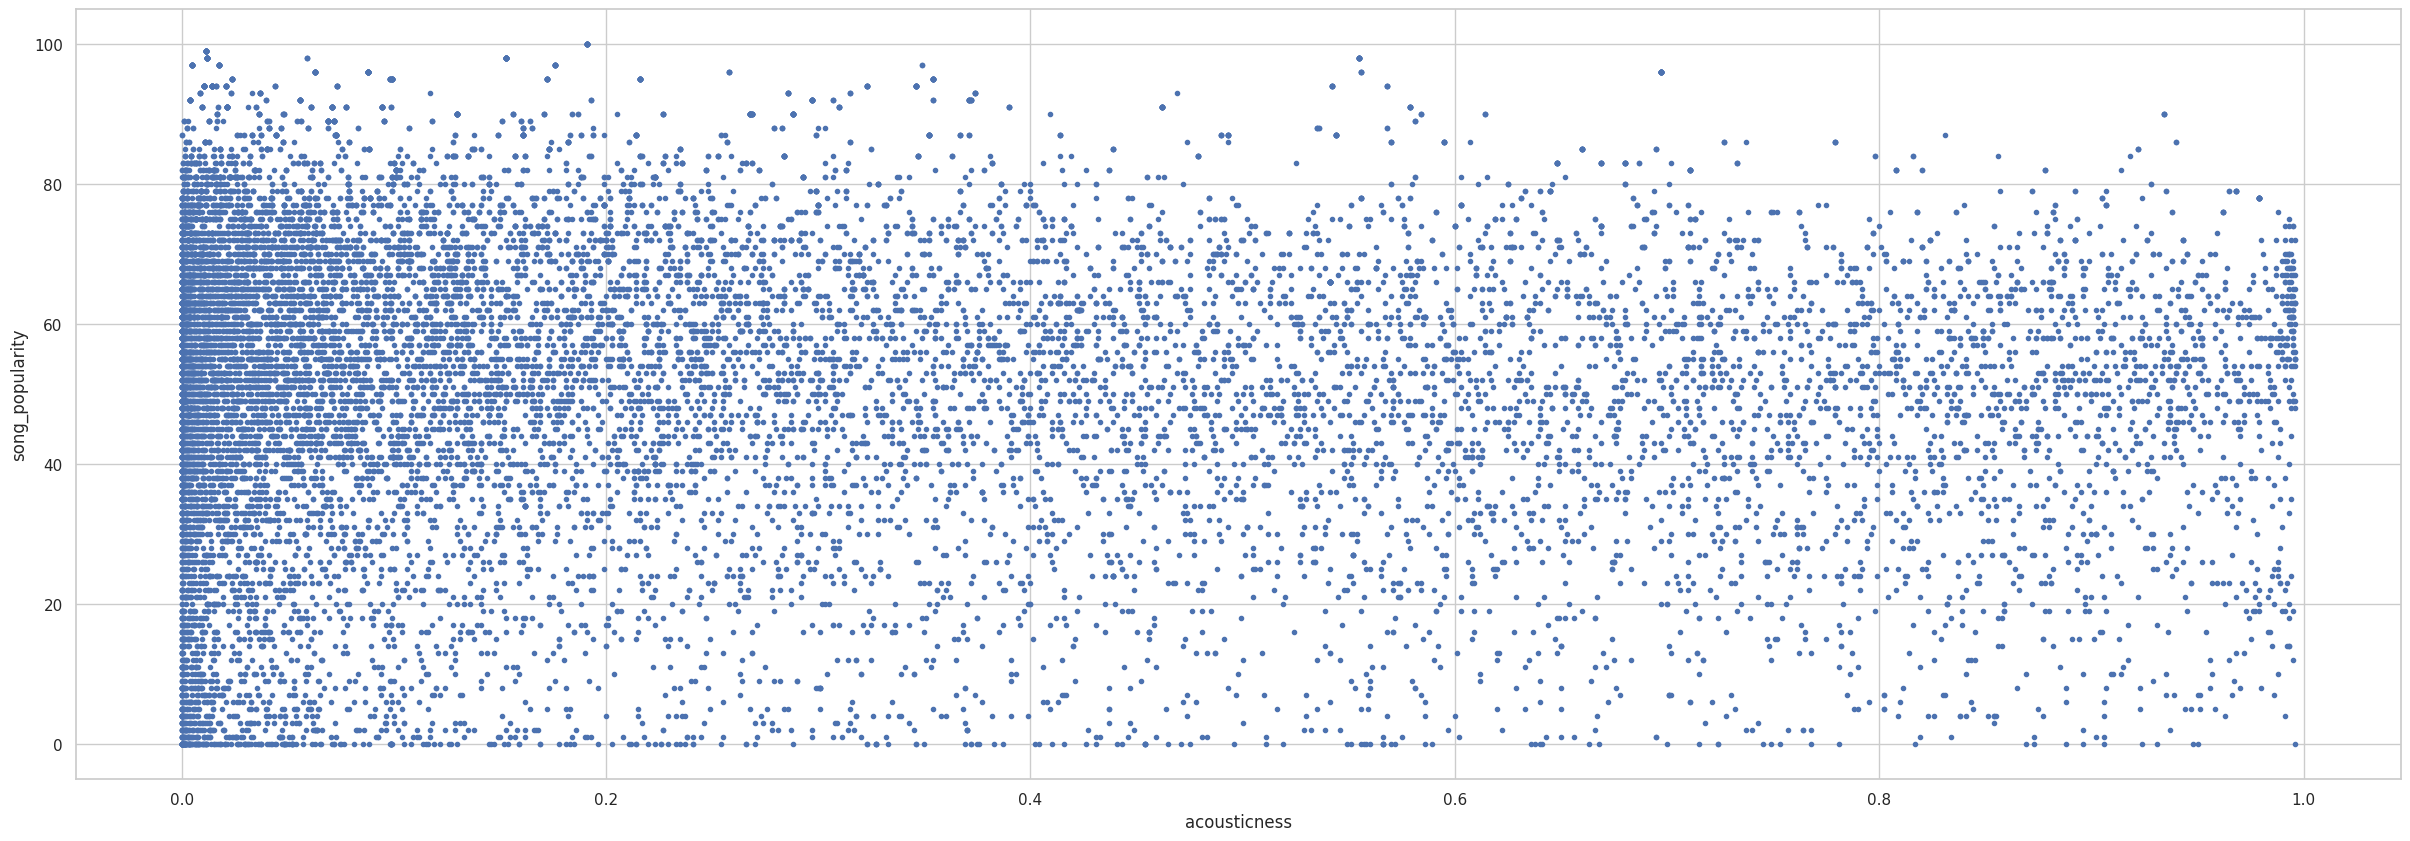

In [245]:
plt.figure(figsize=(30, 10))

xs = df['acousticness'].to_numpy()
ys = df['song_popularity'].to_numpy()
plt.ylabel('song_popularity')
plt.xlabel('acousticness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean acousticness for song popularity')

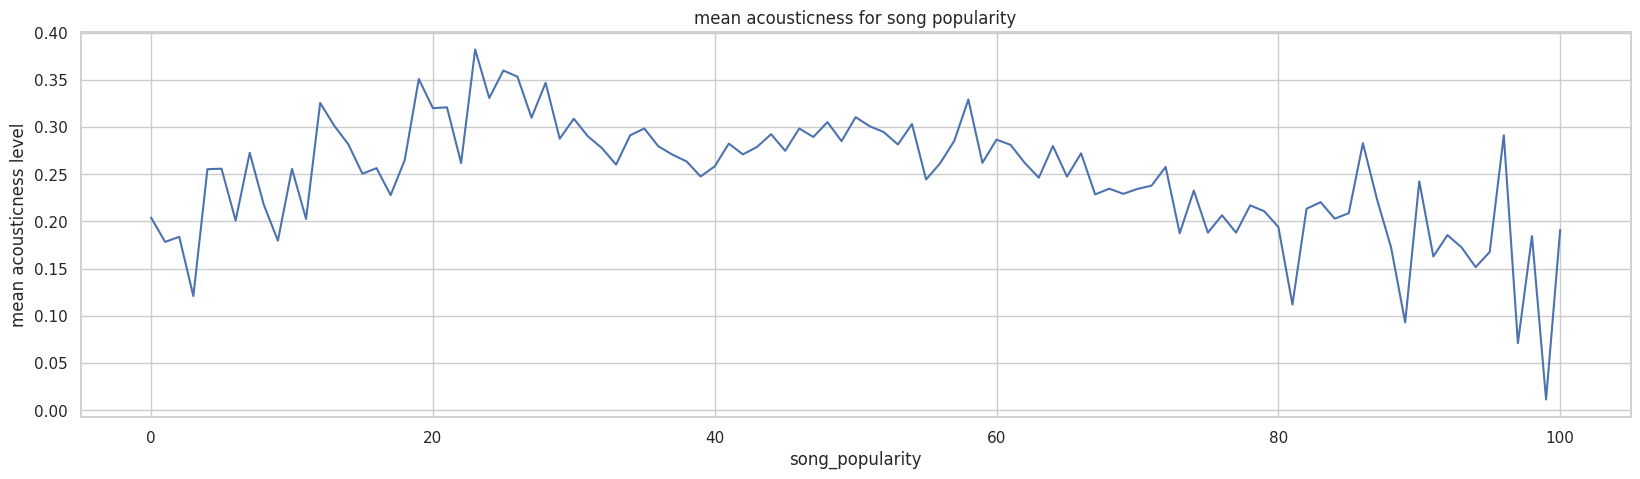

In [246]:
plt.figure(figsize=(20, 5))
sns.set(style='whitegrid')

# group by the song's popularity and then get the mean energy
x = df.groupby('song_popularity')['acousticness'].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('song_popularity')
axis.set_title('mean acousticness for song popularity')